<a href="https://colab.research.google.com/github/gavrieldavidov/gavriel/blob/main/Medicalpremium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Medical Insurance Premium Prediction,EDA and Prediction Model

## Introduction


### About the Dataset

* The Dataset Contains Health Related Parameters Of The Customers

## Tasks

* To conduct a general EDA, and further understand Health Related Parameters Of The Customers dataset / develop intuition of our data
* Predicting the policy premium and identifying the factors that have petition insurance on the price of the medical premium based on data collected from the individuals.


## Preparation

### Loading the Libraries

Loading Python relevant libraries

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
%matplotlib inline

### Loading the Data

Loading the Health Related Parameters dataset into a DataFrame

In [2]:
medins = pd.read_csv('Medicalpremium.csv')

In [3]:
medins.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
medins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


### Understanding the Data

A few basic details - what is the data-shape in terms of columns & rows, and what details can be found in each column

#### Data Shape

In [5]:
print(f'This Dataframe has {medins.shape[0]} rows over {medins.shape[1]} columns')

This Dataframe has 986 rows over 11 columns


### Cleanup


#### Null Values

This dataset doesn't contain any NaN values, so further cleanup in this area is not required

In [6]:
medins.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

#### Duplicates Rows

In [7]:
medins.nunique()

Age                        49
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
Height                     44
Weight                     74
KnownAllergies              2
HistoryOfCancerInFamily     2
NumberOfMajorSurgeries      4
PremiumPrice               24
dtype: int64

## EDA

In [8]:
medins.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [9]:
categorical = ['Diabetes','BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
numerical = ['Age','Height', 'Weight','PremiumPrice']

In [10]:
medins[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
PremiumPrice,986.0,24336.713996,6248.184382,15000.0,21000.0,23000.0,28000.0,40000.0


In [11]:
def show_distribution(df, column):
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    
    text  = 'Std dev: ' + str(round(df[column].std(), 2)) + '\n'
    text += 'Mean: ' + str(round(df[column].mean(), 2)) + '\n'
    text += 'Median: ' + str(round(df[column].median(), 2)) + '\n'

    fig.suptitle(column)
    
    # Histogram
    num_bins = int(round(df[column].count()**(1/3)*2, 0))
    sns.histplot(medins[column], bins=num_bins, ax=axes[0])
    axes[0].set_title('Distribution I')
    axes[0].text(0.35, 0.7, text, fontsize=10, transform=plt.gcf().transFigure)
    
    # Box Plot
    sns.boxplot(x=column,
                data=medins, 
                showmeans=True,
                meanline=True,
                meanprops={'color':'white'},
                ax=axes[1])
    axes[1].set_title('Distribution II')

    plt.show()

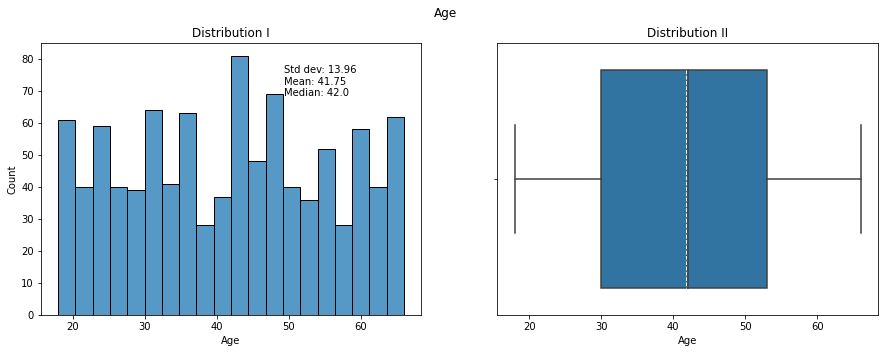

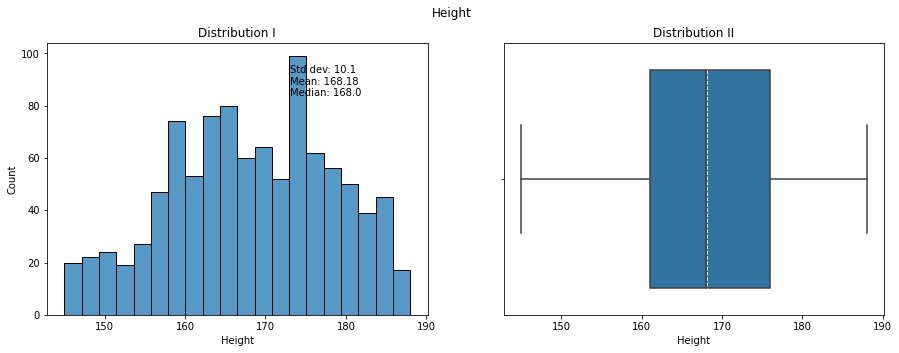

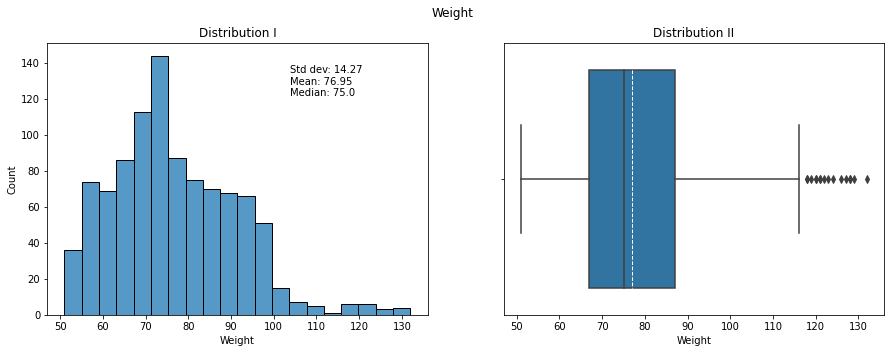

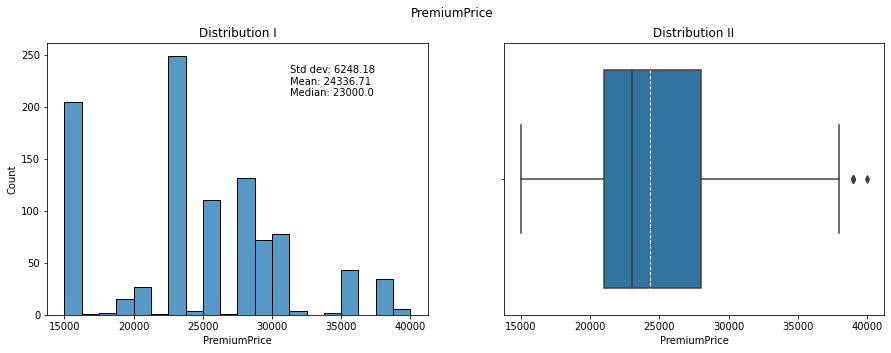

In [12]:
for column in numerical:
    show_distribution(medins,column)

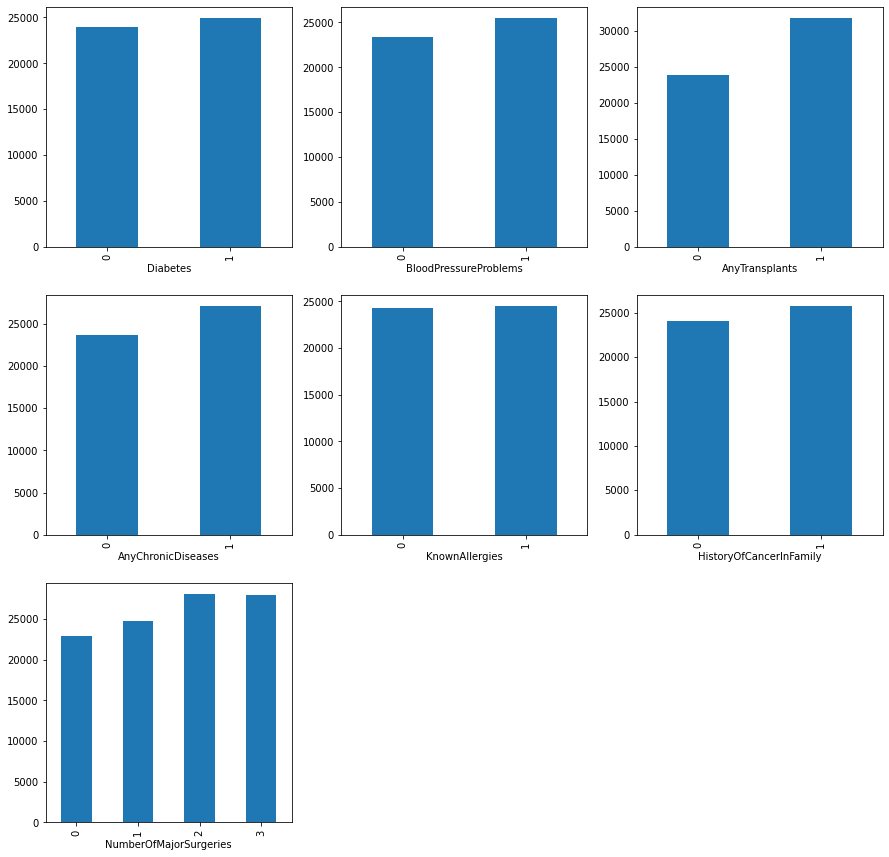

In [13]:
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in categorical:
    plt.subplot(a,b,c)
    medins.groupby(feature)['PremiumPrice'].mean().plot.bar()
    c=c+1
    
plt.show()

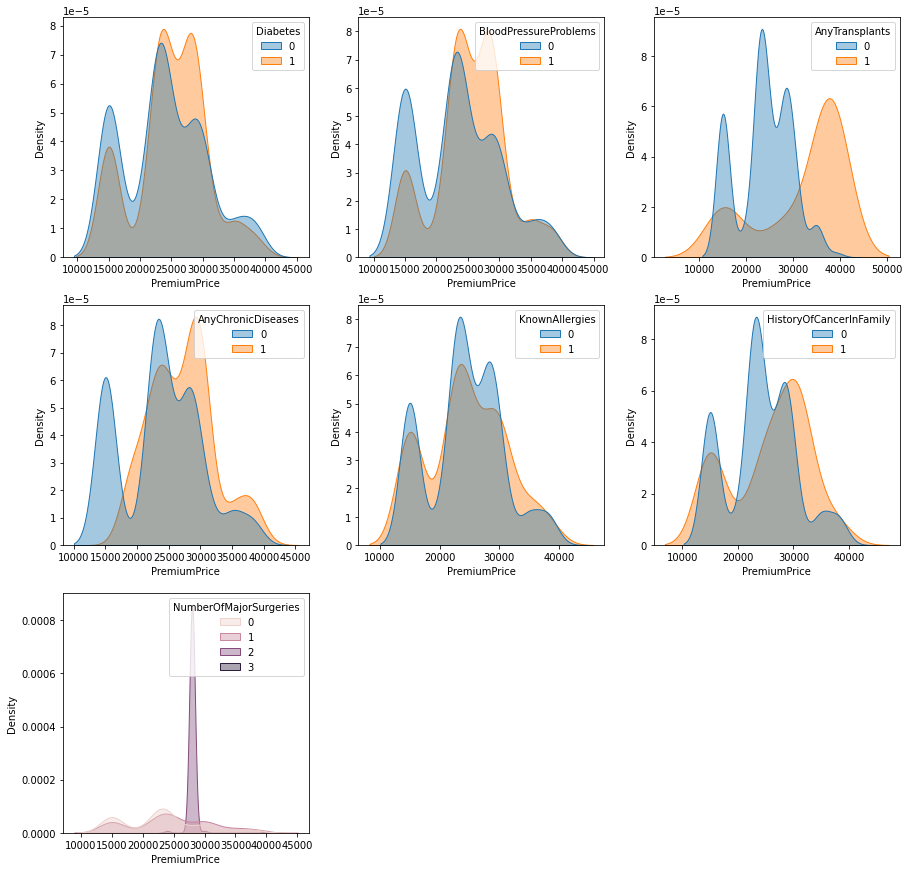

In [14]:
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in categorical:
    plt.subplot(a,b,c)
    sns.kdeplot(x='PremiumPrice', data=medins, hue=feature, fill=True, common_norm=False, 
                alpha =0.4, warn_singular=False)
    c=c+1
    
plt.show()

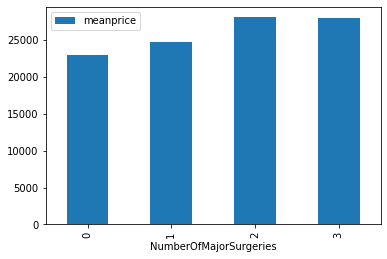

In [15]:
medins.groupby('NumberOfMajorSurgeries').agg(meanprice = ('PremiumPrice','mean')).plot.bar()

plt.show()

<Figure size 2160x5040 with 0 Axes>

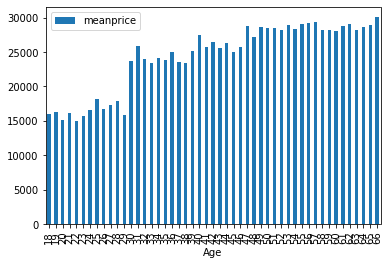

In [16]:
plt.figure(figsize=(30,70))
medins.groupby('Age').agg(meanprice = ('PremiumPrice','mean')).plot.bar()
plt.show()

In [17]:
medins['BMI'] = medins['Weight']/((medins['Height']/100)**2) 


In [18]:
medins.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [19]:
def rank(columns):
  if 0 <= columns <= 18.4999:
      return 'Underweight'
  elif 18.5 <= columns <= 24.9999:
      return 'proper weight'    
  elif 25 <= columns <= 29.9999:
      return 'Overweight'
  elif  columns > 30:
      return 'obesity'
  else:
      return('<1')

In [20]:
medins['BMIRange'] = medins['BMI'].apply(rank)

In [21]:
filterBMI = medins['BMIRange'] == '<1'
medins['BMI'][filterBMI]

Series([], Name: BMI, dtype: float64)

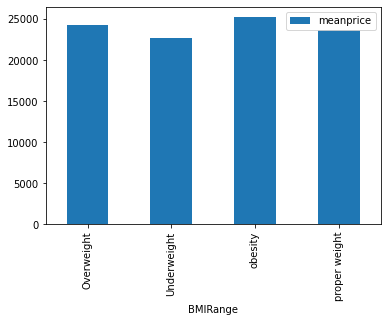

In [22]:
medins.groupby('BMIRange').agg(meanprice = ('PremiumPrice','mean')).plot.bar()
plt.show()

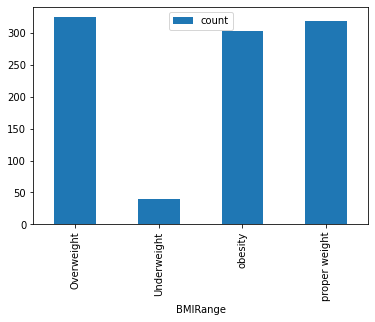

In [23]:
medins.groupby('BMIRange').agg(count = ('Age','size')).plot.bar()
plt.show()

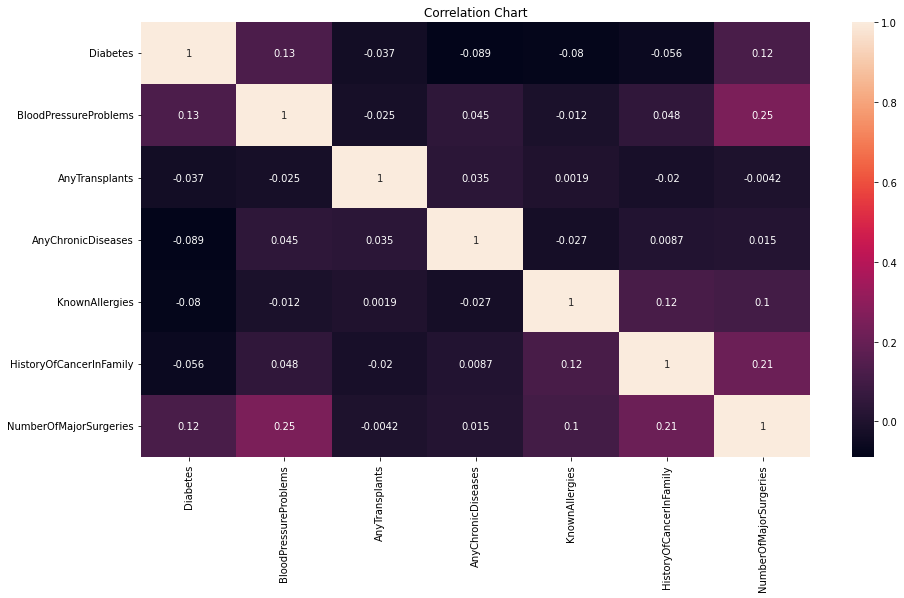

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(medins[categorical].corr(),annot=True)\
.set(title =  'Correlation Chart');

## Predicting the policy premium

### RandomForest

In [25]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


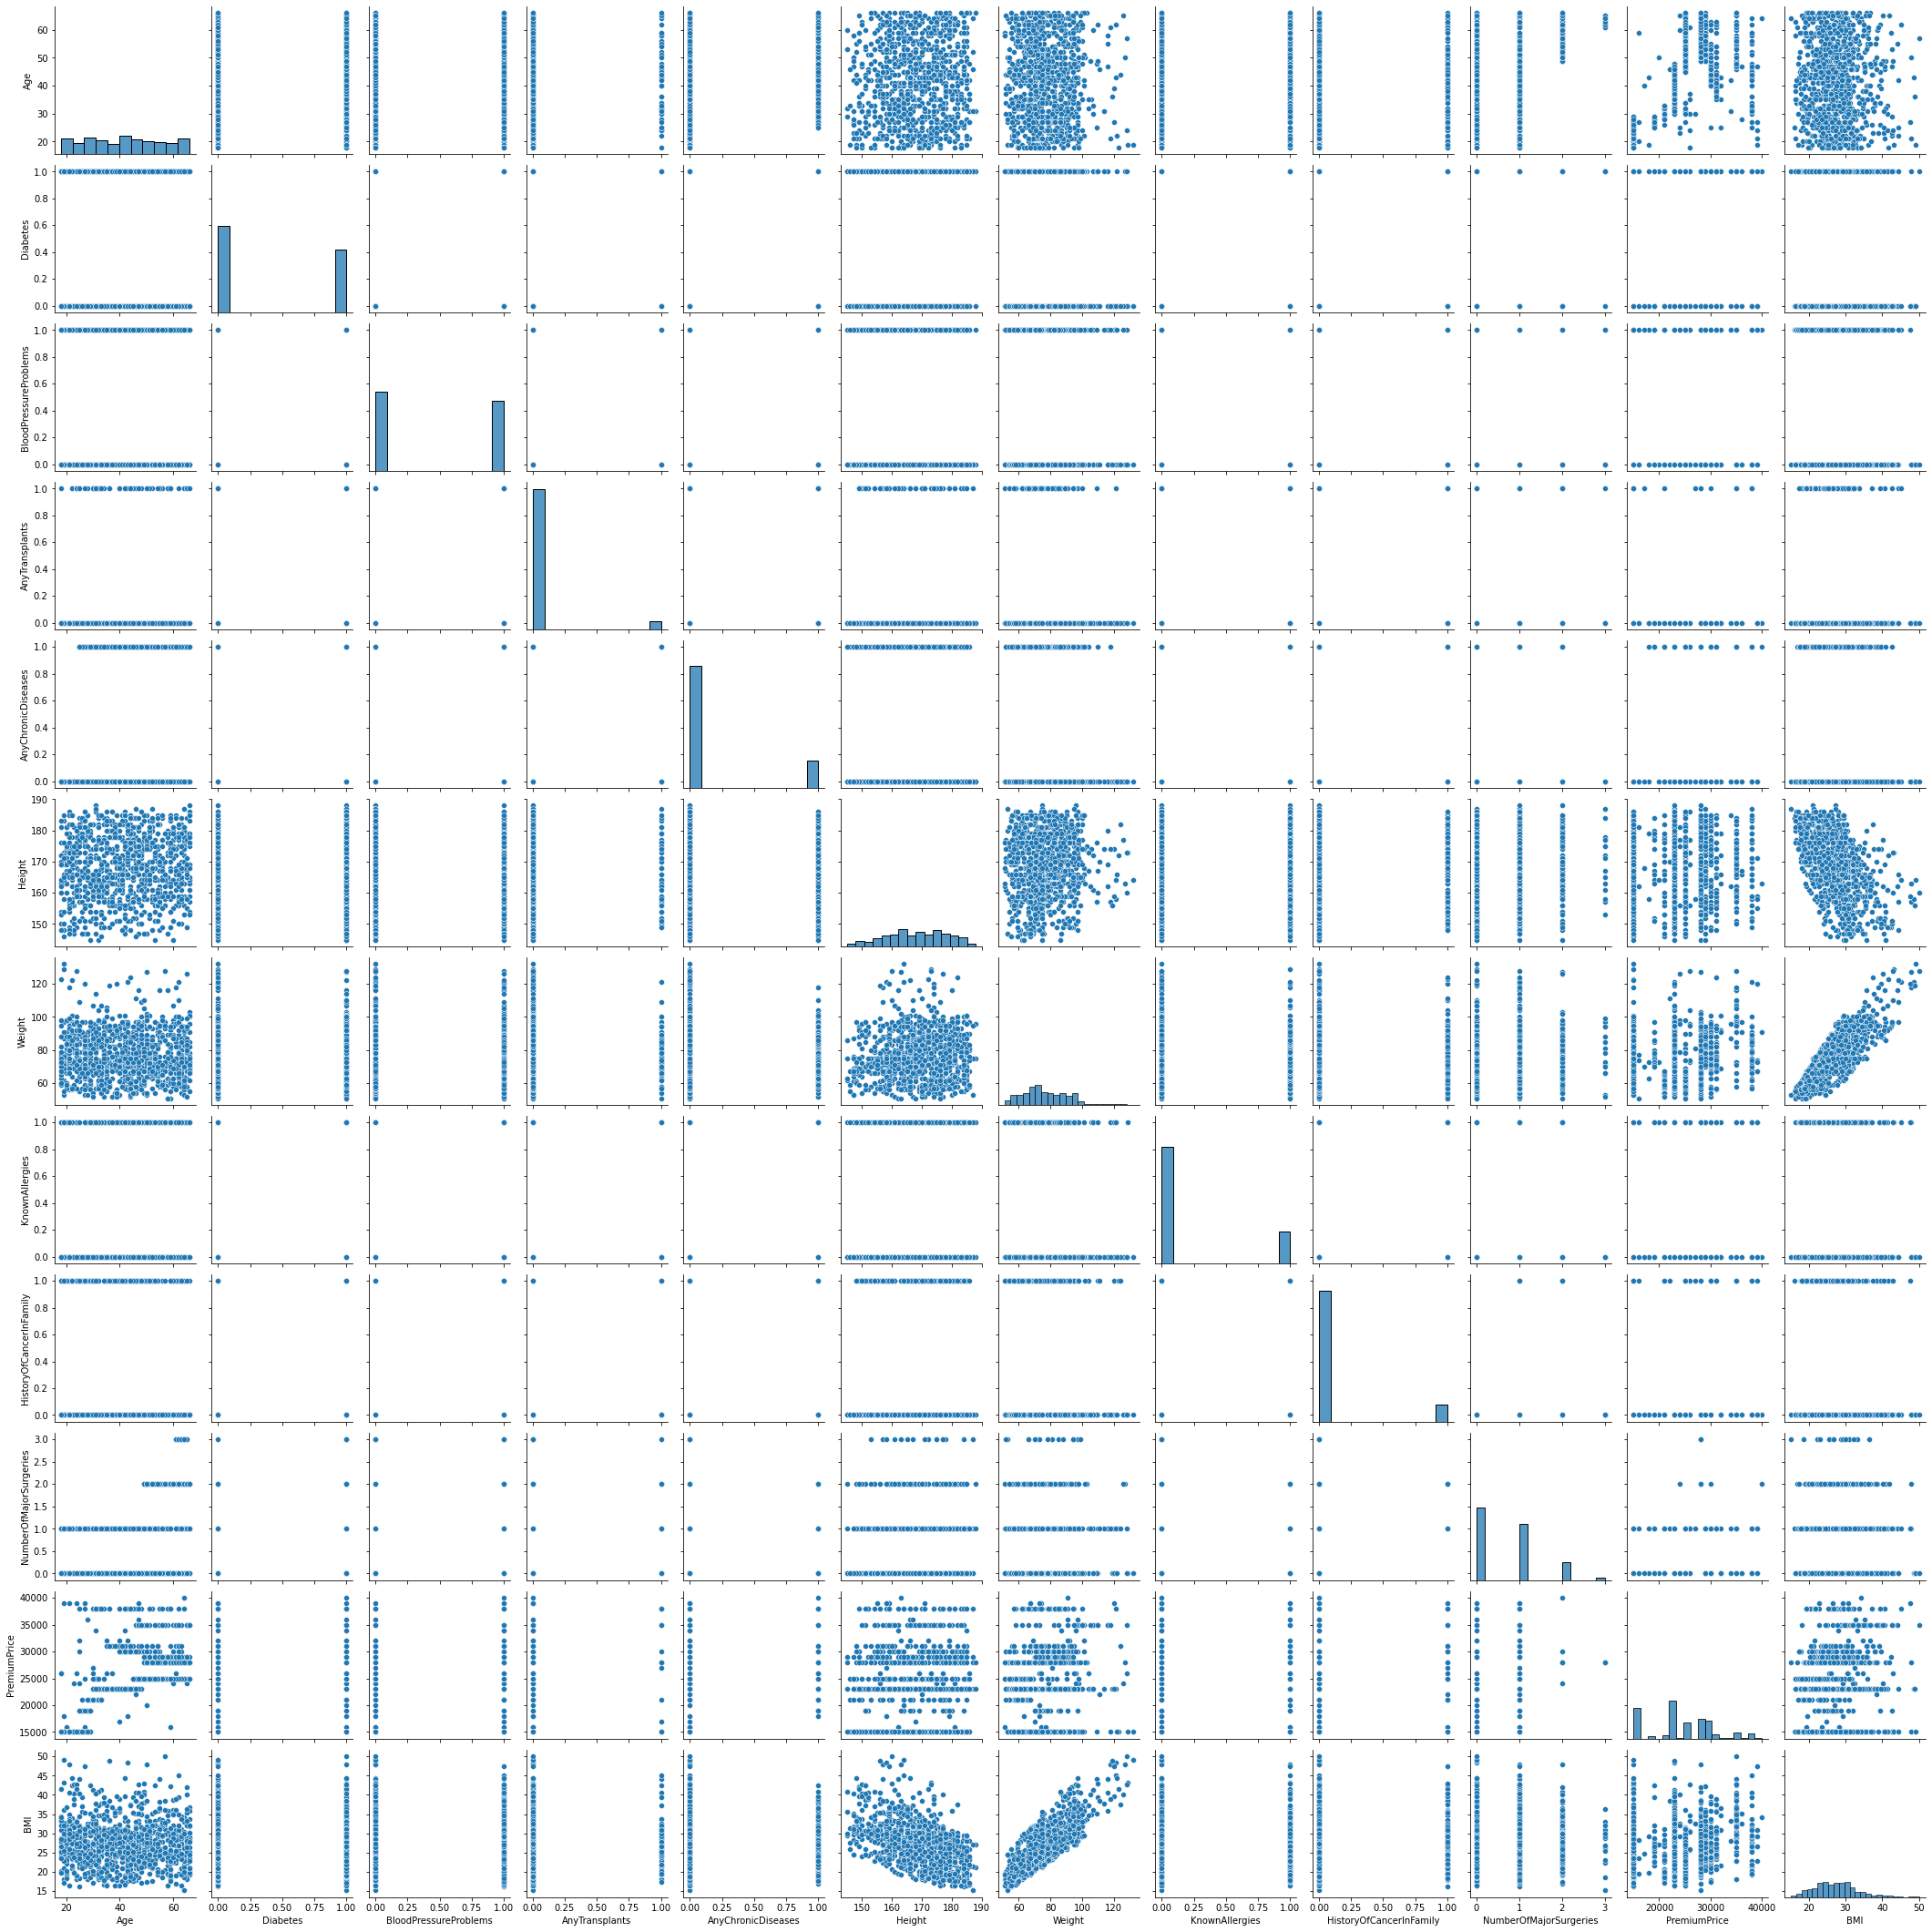

In [26]:
sns.pairplot(medins)

In [79]:
from sklearn.linear_model  import LinearRegression

In [80]:
regressor = LinearRegression()

In [81]:
x = medins[['BMI','Age','Diabetes','BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
x.head()

,BMI,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,23.725286,45,0,0,0,0,0,0,0
1,22.530864,60,1,0,0,0,0,0,0
2,23.634033,36,1,1,0,0,0,0,1
3,27.770313,52,1,1,0,1,0,0,2
4,31.934969,38,0,0,0,1,0,0,1


In [82]:
y = medins['PremiumPrice']
y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [84]:
x_train.shape

(788, 9)

In [85]:
x_test.shape

(198, 9)

In [86]:
y_train.shape

(788,)

In [87]:
y_test.shape

(198,)

In [89]:
regressor.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred =  regressor.predict(x_test)
y_pred

array([24936.59463785, 28646.42082977, 27697.1838481 , 16884.69881421,
       19661.94271692, 19061.8672167 , 19951.97963354, 20230.22633499,
       15165.35922403, 16223.25384863, 22955.09043078, 21415.54246373,
       22782.2323306 , 14930.62533393, 25820.91369463, 29020.07795954,
       20868.52491889, 18808.72156876, 19275.26627139, 28005.52587234,
       27884.03684295, 22322.01777106, 22764.03638647, 22460.28982091,
       15952.28766382, 28630.74311643, 30967.66222452, 22476.68378172,
       19609.70505299, 23796.6411181 , 28488.65507216, 30553.37881455,
       21866.85602024, 18980.50700075, 19968.49800623, 22047.5496815 ,
       19320.3856456 , 17077.24756444, 16879.5725833 , 25711.98926985,
       22249.25090316, 28194.53447565, 29049.11467765, 18872.9339171 ,
       26766.49251994, 22162.16182824, 24962.33195917, 14668.35369985,
       36114.27324072, 26802.41988107, 18761.53661828, 27773.67299113,
       28058.58110316, 18002.09882136, 21984.42015731, 23874.6229467 ,
      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


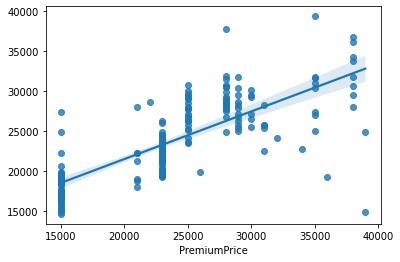

In [91]:
sns.regplot(y_test,y_pred)

In [93]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

4210.696226216004

In [94]:
regressor.coef_

array([ 159.25735803,  327.97594157, -630.36810682,  128.55392073,
       7825.55608855, 2660.93583202,  251.23548512, 2385.10427641,
       -483.90318167])

In [95]:
df = pd.DataFrame(['BMI','Age','Diabetes','BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'],regressor.coef_,columns=['feature'])

In [96]:
df

,feature
159.257358,BMI
327.975942,Age
-630.368107,Diabetes
128.553921,BloodPressureProblems
7825.556089,AnyTransplants
2660.935832,AnyChronicDiseases
251.235485,KnownAllergies
2385.104276,HistoryOfCancerInFamily
-483.903182,NumberOfMajorSurgeries


### xgboost

In [97]:
import xgboost

In [98]:
from xgboost import XGBRegressor

In [104]:
x = medins.drop(['PremiumPrice','BMIRange'], axis =1)
y =medins['PremiumPrice']

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [107]:
xgboost = XGBRegressor()
xgboost.fit(x_train,y_train)

[12:43:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


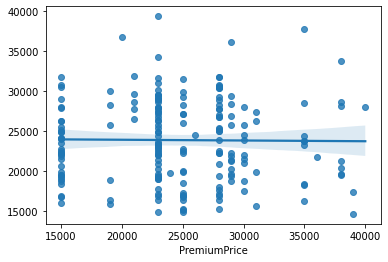

In [108]:
sns.regplot(y_test,y_pred)

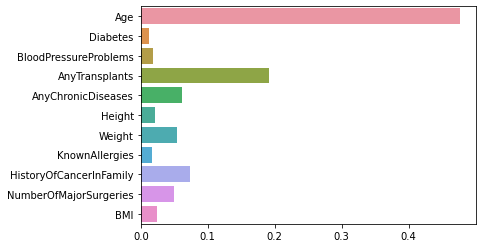

In [109]:
feature_imp2 = xgboost.feature_importances_
sns.barplot(x=feature_imp2,y=x.columns)

In [110]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

8089.915359795071

### Decision Tree Classifier

In [114]:
import sklearn

In [115]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from google.colab import files

In [147]:
#split dataset in features and target variable
feature_cols = ['BMI','Age','Diabetes','BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
X = medins[feature_cols] # Features
y = medins['PremiumPrice'] # Target variable

In [142]:
x

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
0,45,0,0,0,0,155,57,0,0,0,23.725286
1,60,1,0,0,0,180,73,0,0,0,22.530864
2,36,1,1,0,0,158,59,0,0,1,23.634033
3,52,1,1,0,1,183,93,0,0,2,27.770313
4,38,0,0,0,1,166,88,0,0,1,31.934969
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,23.458562
982,64,1,1,0,0,153,70,0,0,3,29.903029
983,56,0,1,0,0,155,71,0,0,1,29.552549
984,47,1,1,0,0,158,73,1,0,1,29.242109


In [ ]:
y

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
X_train.shape

(788, 9)

In [125]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier() 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [126]:
X_test

,BMI,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
231,22.839506,36,1,0,0,0,0,0,0
688,21.857278,46,1,1,0,0,1,0,1
27,38.594798,60,0,1,0,0,0,0,2
366,27.660096,48,0,1,0,0,0,0,1
715,19.493177,32,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...
961,27.829314,59,1,1,0,0,0,1,1
37,28.228979,58,0,1,0,1,0,0,1
648,19.198960,63,1,1,0,0,0,0,2
926,26.502116,24,0,1,0,0,0,0,0


In [127]:
y_pred

array([23000, 23000, 28000, 23000, 21000, 23000, 15000, 35000, 30000,
       29000, 23000, 23000, 15000, 25000, 30000, 15000, 23000, 35000,
       15000, 28000, 15000, 28000, 23000, 15000, 19000, 38000, 23000,
       29000, 35000, 29000, 35000, 15000, 26000, 15000, 25000, 23000,
       23000, 25000, 29000, 19000, 28000, 38000, 23000, 19000, 23000,
       15000, 28000, 26000, 25000, 28000, 15000, 21000, 15000, 28000,
       30000, 28000, 25000, 28000, 35000, 21000, 29000, 28000, 29000,
       25000, 29000, 22000, 15000, 23000, 29000, 25000, 23000, 23000,
       30000, 15000, 28000, 28000, 23000, 30000, 35000, 23000, 35000,
       28000, 15000, 25000, 23000, 28000, 15000, 23000, 30000, 23000,
       38000, 21000, 31000, 23000, 23000, 19000, 30000, 25000, 38000,
       28000, 31000, 23000, 19000, 15000, 28000, 25000, 25000, 23000,
       23000, 23000, 15000, 28000, 28000, 35000, 38000, 29000, 23000,
       23000, 30000, 39000, 23000, 28000, 23000, 38000, 23000, 25000,
       23000, 15000,

In [128]:
y_test.values

array([23000, 23000, 28000, 23000, 38000, 23000, 15000, 29000, 25000,
       35000, 23000, 23000, 15000, 25000, 30000, 15000, 23000, 29000,
       15000, 40000, 15000, 28000, 23000, 15000, 19000, 38000, 23000,
       25000, 29000, 35000, 35000, 15000, 15000, 15000, 25000, 23000,
       23000, 25000, 25000, 19000, 28000, 19000, 23000, 19000, 23000,
       15000, 28000, 39000, 29000, 28000, 15000, 21000, 15000, 28000,
       30000, 28000, 25000, 28000, 35000, 23000, 29000, 28000, 30000,
       30000, 25000, 31000, 15000, 23000, 29000, 23000, 23000, 23000,
       30000, 15000, 28000, 28000, 23000, 25000, 29000, 23000, 30000,
       28000, 15000, 29000, 23000, 28000, 15000, 23000, 30000, 23000,
       38000, 38000, 31000, 23000, 21000, 19000, 25000, 25000, 38000,
       28000, 25000, 23000, 21000, 15000, 28000, 25000, 25000, 23000,
       23000, 23000, 15000, 28000, 28000, 35000, 38000, 35000, 26000,
       23000, 25000, 15000, 23000, 28000, 23000, 38000, 23000, 29000,
       21000, 15000,

In [129]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7424242424242424


In [130]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [132]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


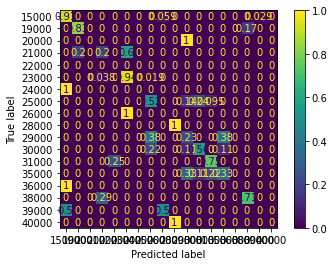

In [133]:
plot_confusion_matrix(clf, X_test, y_test,normalize='true')

In [134]:
from sklearn.metrics import ConfusionMatrixDisplay

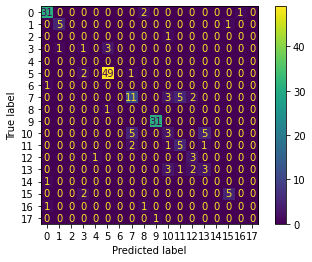

In [135]:
conf_mat=ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
conf_mat.plot()

In [136]:
from sklearn import tree

In [ ]:
# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(medins[feature_cols], medins['PremiumPrice'])

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(classification_tree, out_file=None, 
                     feature_names=medins[feature_cols],  
                     class_names=medins['PremiumPrice'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("medins")
files.download('medims.pdf')